<a href="https://colab.research.google.com/github/itdhirendra/IITRoorke_DS_AIML/blob/main/Post_Modelling_Activities_%E2%80%93_Assignment_Submitedby_Dhirendra_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training
examples and 10,000 test examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. The task is to classify these images into an
apparel category amongst 10 categories on which the dataset is benchmarked

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import datetime

1. **Load Fashion MNIST dataset**

In [2]:

(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


 2. Normalize images

In [3]:

train_X, test_X = train_X / 255.0, test_X / 255.0


 3. One-hot encode labels

In [4]:
train_y_cat = to_categorical(train_y, 10)
test_y_cat = to_categorical(test_y, 10)


 4.  sample images Visualization

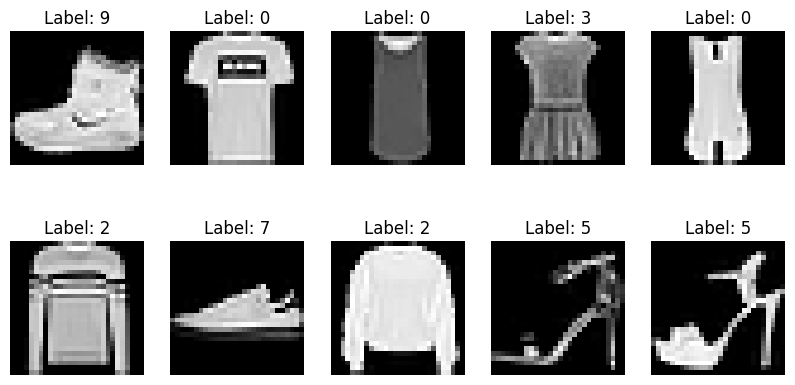

In [5]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title(f"Label: {train_y[i]}")
    plt.axis('off')
plt.show()

5. Build the model

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6. Compile the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

9. Evaluate on test data

In [9]:
test_loss, test_acc = model.evaluate(test_X, test_y_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0199 - loss: 2.4664
Test Accuracy: 0.0208


In [10]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_X, train_y_cat, epochs=10, validation_split=0.2, callbacks=[tensorboard_cb])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7648 - loss: 0.6546 - val_accuracy: 0.8497 - val_loss: 0.4055
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8605 - loss: 0.3786 - val_accuracy: 0.8462 - val_loss: 0.4204
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8694 - loss: 0.3498 - val_accuracy: 0.8752 - val_loss: 0.3430
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8823 - loss: 0.3133 - val_accuracy: 0.8817 - val_loss: 0.3273
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8906 - loss: 0.2935 - val_accuracy: 0.8787 - val_loss: 0.3409
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8956 - loss: 0.2807 - val_accuracy: 0.8738 - val_loss: 0.3476
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9028 - loss: 0.2582 - val_accuracy: 0.8813 - val_loss: 0.3211
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9045 - loss: 0.255

In [11]:
test_loss, test_accuracy = model.evaluate(test_X, test_y_cat)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3606
Test Loss: 0.3650
Test Accuracy: 0.8771


# 10. Save model : fashion_mnist_model.h5

In [12]:
model.save("fashion_mnist_model.h5")


 11. Load and verify saved model

In [13]:
loaded_model = tf.keras.models.load_model("fashion_mnist_model.h5")
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,764 (948.30 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

12. Confirm weight consistency

In [14]:
original_weights = model.get_weights()
loaded_weights = loaded_model.get_weights()

for i in range(len(original_weights)):
    assert np.array_equal(original_weights[i], loaded_weights[i]), "Mismatch in weights!"
print("Model architecture and weights are consistent after loading.")

Model architecture and weights are consistent after loading.
